In [1]:
from qiskit_aer import AerSimulator
from qiskit import *
import supermarq
from qiskit.providers.fake_provider import *
import numpy as np 
import os

########## INPUT ############
f=5 # number of fake_backend want to choose
lower_limit= 3 # the lower limit of qubits for the circuit
upper_limit= 17 # the lower limit of qubits for the circuit
steps= 2 #jump in qubit numbers

In [2]:
all_fakes=[FakeAlmadenV2,FakeArmonkV2,FakeAthensV2,FakeAuckland,FakeBelemV2,FakeBoeblingenV2,FakeBogotaV2,FakeBrooklynV2,FakeBurlingtonV2,FakeCairoV2,FakeCambridgeV2,FakeCasablancaV2,FakeEssexV2,FakeGeneva,FakeGuadalupeV2,FakeHanoiV2,FakeJakartaV2,FakeJohannesburgV2,FakeKolkataV2,FakeLagosV2,FakeLimaV2,FakeLondonV2,FakeManhattanV2,FakeManilaV2,FakeMelbourneV2,FakeMontrealV2,FakeMumbaiV2,FakeNairobiV2,FakeOslo,FakeOurenseV2,FakeParisV2,FakePerth,FakePrague,FakePoughkeepsieV2,FakeQuitoV2,FakeRochesterV2,FakeRomeV2,FakeSantiagoV2,FakeSherbrooke,FakeSingaporeV2,FakeSydneyV2,FakeTorontoV2,FakeValenciaV2,FakeVigoV2,FakeWashingtonV2,FakeYorktownV2]
import random; selected_fakes = random.sample(all_fakes, f)
selected_fakes  # having any randomly selected 5 fake backends out of 46 mentioned in the inital list

[qiskit.providers.fake_provider.backends.singapore.fake_singapore.FakeSingaporeV2,
 qiskit.providers.fake_provider.backends.washington.fake_washington.FakeWashingtonV2,
 qiskit.providers.fake_provider.backends.jakarta.fake_jakarta.FakeJakartaV2,
 qiskit.providers.fake_provider.backends.vigo.fake_vigo.FakeVigoV2,
 qiskit.providers.fake_provider.backends.lima.fake_lima.FakeLimaV2]

In [3]:
benchmarks=[]
for i in range(lower_limit,upper_limit,steps):
    label = "ghz"+str(i)
    benchmarks.append((supermarq.ghz.GHZ(i),label))
for i in benchmarks:
    circuit=i[0].qiskit_circuit()
    print("--------------------------",i[1],"---------------------------")
    #circuit.draw(output="mpl")
    print(circuit.draw())

-------------------------- ghz3 ---------------------------
     ┌───┐          ┌─┐      
q_0: ┤ H ├──■───────┤M├──────
     └───┘┌─┴─┐     └╥┘┌─┐   
q_1: ─────┤ X ├──■───╫─┤M├───
          └───┘┌─┴─┐ ║ └╥┘┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     0  1  2 
-------------------------- ghz5 ---------------------------
     ┌───┐          ┌─┐                      
q_0: ┤ H ├──■───────┤M├──────────────────────
     └───┘┌─┴─┐     └╥┘     ┌─┐              
q_1: ─────┤ X ├──■───╫──────┤M├──────────────
          └───┘┌─┴─┐ ║      └╥┘     ┌─┐      
q_2: ──────────┤ X ├─╫───■───╫──────┤M├──────
               └───┘ ║ ┌─┴─┐ ║      └╥┘┌─┐   
q_3: ────────────────╫─┤ X ├─╫───■───╫─┤M├───
                     ║ └───┘ ║ ┌─┴─┐ ║ └╥┘┌─┐
q_4: ────────────────╫───────╫─┤ X ├─╫──╫─┤M├
                     ║       ║ └───┘ ║  ║ └╥┘
c: 5/════════════════╩═══════╩═══════╩══╩══╩═
                     0       1       2  3  4 
------------

In [4]:
benchmark_features = {}
for benchmark, label in benchmarks:
    benchmark_features[label] = [
        supermarq.converters.compute_communication_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_depth_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_entanglement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_liveness_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_measurement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_parallelism_with_qiskit(benchmark.qiskit_circuit()),]
print(benchmark_features)

{'ghz3': [0.6666666666666666, 1.0, 0.6666666666666666, 0.6666666666666666, 0.0, 0], 'ghz5': [0.4, 1.0, 0.8, 0.4666666666666667, 0.0, 0], 'ghz7': [0.2857142857142857, 1.0, 0.8571428571428571, 0.35714285714285715, 0.0, 0], 'ghz9': [0.2222222222222222, 1.0, 0.8888888888888888, 0.28888888888888886, 0.0, 0], 'ghz11': [0.18181818181818182, 1.0, 0.9090909090909091, 0.24242424242424243, 0.0, 0], 'ghz13': [0.15384615384615385, 1.0, 0.9230769230769231, 0.2087912087912088, 0.0, 0], 'ghz15': [0.13333333333333333, 1.0, 0.9333333333333333, 0.18333333333333332, 0.0, 0]}


In [5]:
jobs =[]
print("=============SCORES OF ALL THE CIRCUITS=============")    
for backend in selected_fakes:
    print("------------------------BACKEND-NAME :: ", backend().name)
    for benchmark, label in benchmarks:
        circuit=benchmark.qiskit_circuit()
        score_list=[]
        for i in range(0,5):
            job = backend().run(circuit, shots=1000)
            result=job.result()
            counts = job.result(0).get_counts()
            score = benchmark.score(counts)
            score_list.append(score)
        score = np.mean(score_list) 
        sd = np.std(score_list)
        print(label," :: ",score,"                       SD :: ",sd)
        #counts=job.result(0).count()
        jobs.append((label,benchmark,backend,job,score,sd))
#jobs

=============SCORES OF ALL THE CIRCUITS=============
------------------------BACKEND-NAME ::  fake_singapore
ghz3  ::  0.846604771219605                        SD ::  0.002455922204920453
ghz5  ::  0.7613014752596375                        SD ::  0.007501565517173458
ghz7  ::  0.6845913491586567                        SD ::  0.009198183144869062
ghz9  ::  0.6155188758928828                        SD ::  0.010439099378962096
ghz11  ::  0.5708881246032298                        SD ::  0.005144604112786874
ghz13  ::  0.5036004510369383                        SD ::  0.010395464039936929
ghz15  ::  0.43225343235020075                        SD ::  0.012907730408795295
------------------------BACKEND-NAME ::  fake_washington
ghz3  ::  0.9539219785720243                        SD ::  0.007227592919217092
ghz5  ::  0.7633036366029138                        SD ::  0.010461365420758552
ghz7  ::  0.6855962571192024                        SD ::  0.008113836842224397
ghz9  ::  0.6544301002839339   

In [6]:
all_scores={}  
all_fake_names=[]
all_fake_scores=[]
for i in selected_fakes:
    fakes=i
    #print("SELCETED_FAKES:: ",i)
    i={}
    for label,benchmark,backend,job,score,sd in jobs:
        #supermarq.plotting.plot_results([score], [label])
        if fakes == backend:
            i[label] = score
    device_scores = 'device_score_' +str(fakes().name)
    all_scores[device_scores]= i
    all_fake_scores.append(i)
    all_fake_names.append(device_scores)   
#print(all_scores)    

USED BACKEND:: fake_singapore ; CIRCUIT_NAME: ghz3 ; SCORE = 0.846604771219605


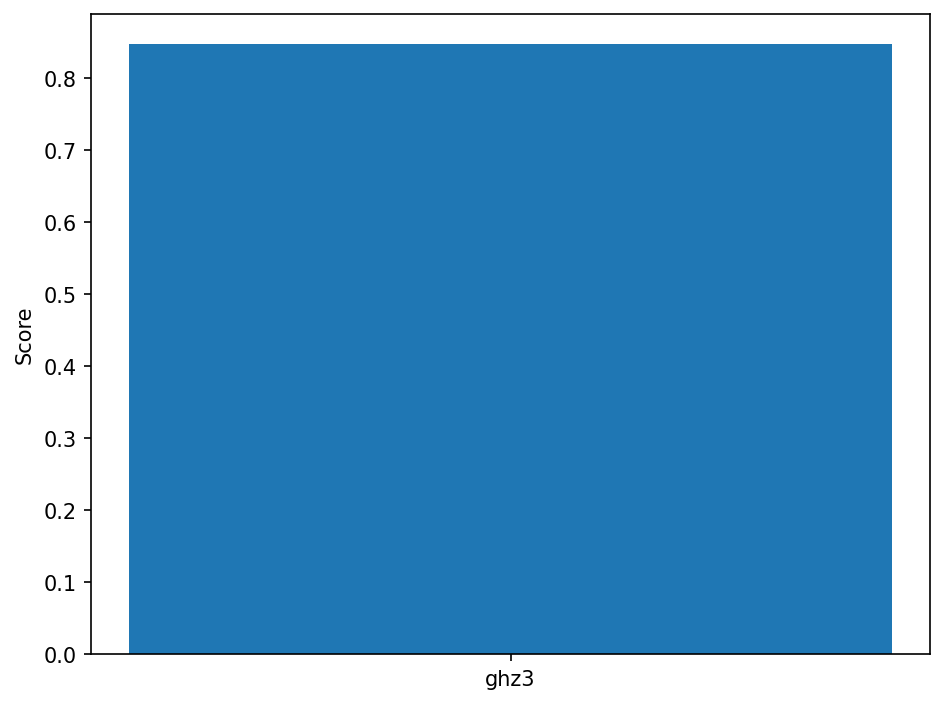

-----------------------------------------------------------
USED BACKEND:: fake_singapore ; CIRCUIT_NAME: ghz5 ; SCORE = 0.7613014752596375


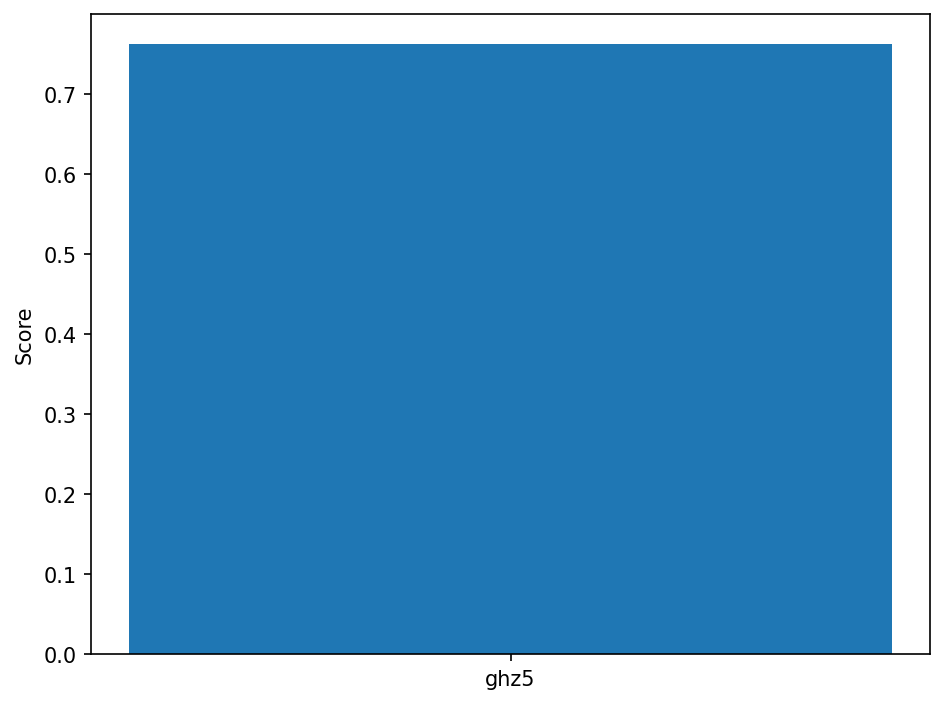

-----------------------------------------------------------
USED BACKEND:: fake_singapore ; CIRCUIT_NAME: ghz7 ; SCORE = 0.6845913491586567


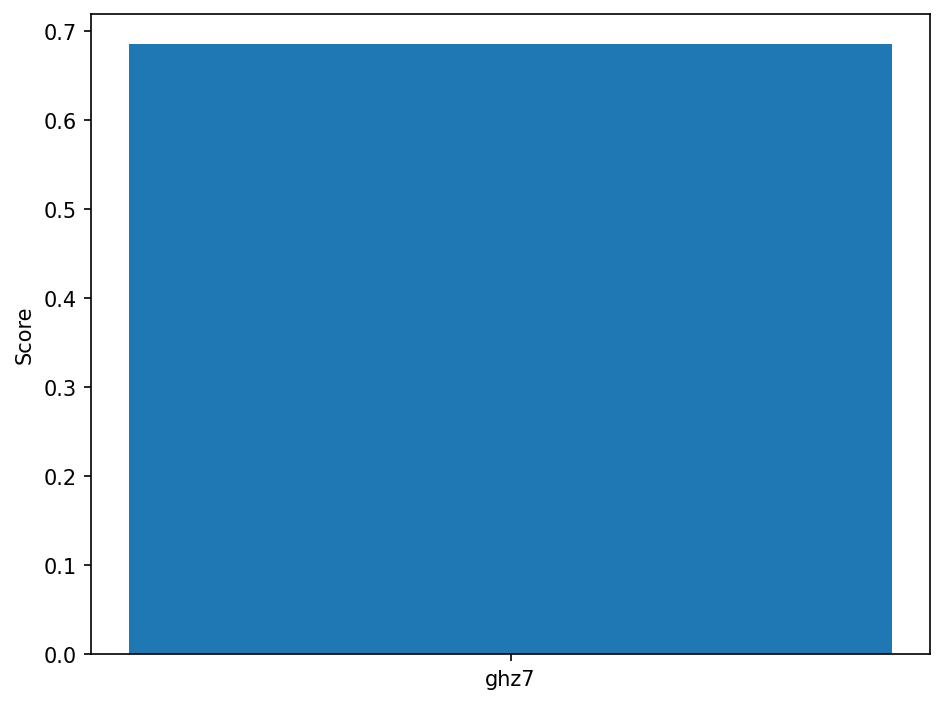

-----------------------------------------------------------
USED BACKEND:: fake_singapore ; CIRCUIT_NAME: ghz9 ; SCORE = 0.6155188758928828


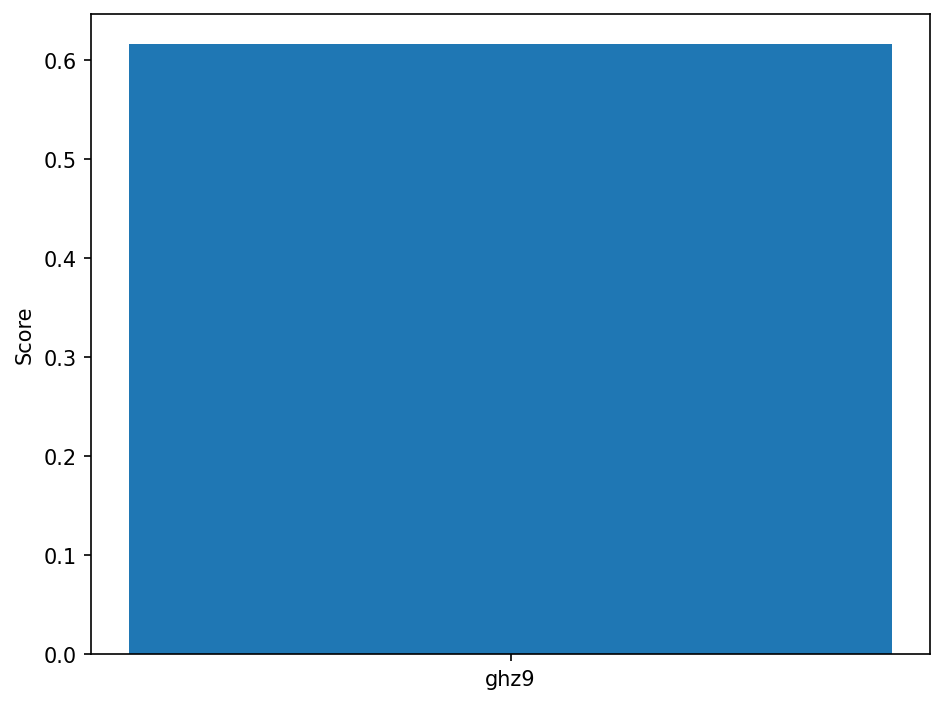

-----------------------------------------------------------
USED BACKEND:: fake_singapore ; CIRCUIT_NAME: ghz11 ; SCORE = 0.5708881246032298


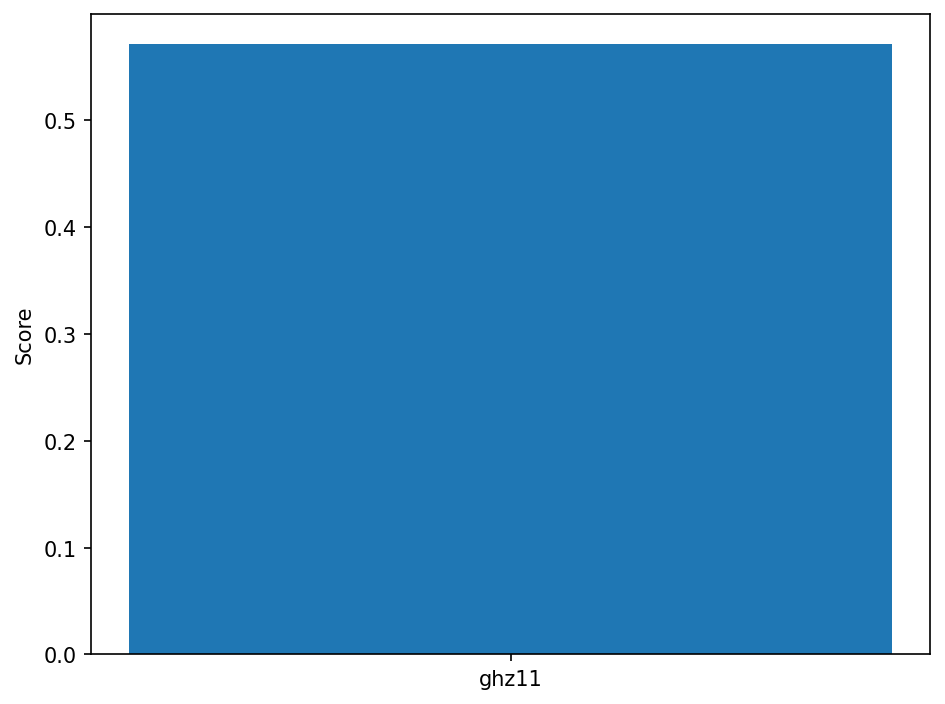

-----------------------------------------------------------
USED BACKEND:: fake_singapore ; CIRCUIT_NAME: ghz13 ; SCORE = 0.5036004510369383


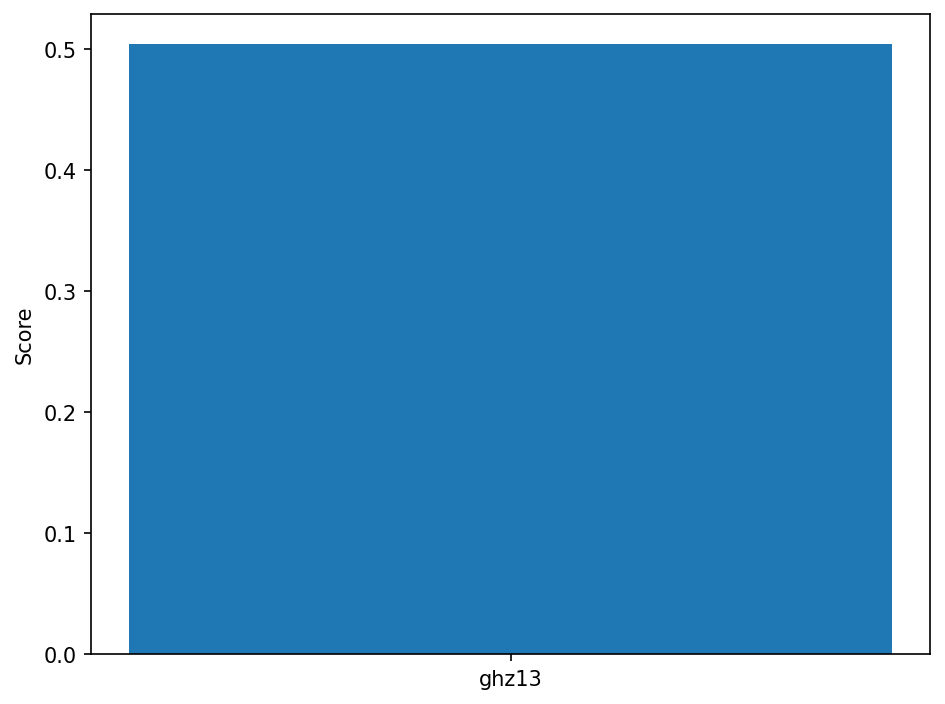

-----------------------------------------------------------
USED BACKEND:: fake_singapore ; CIRCUIT_NAME: ghz15 ; SCORE = 0.43225343235020075


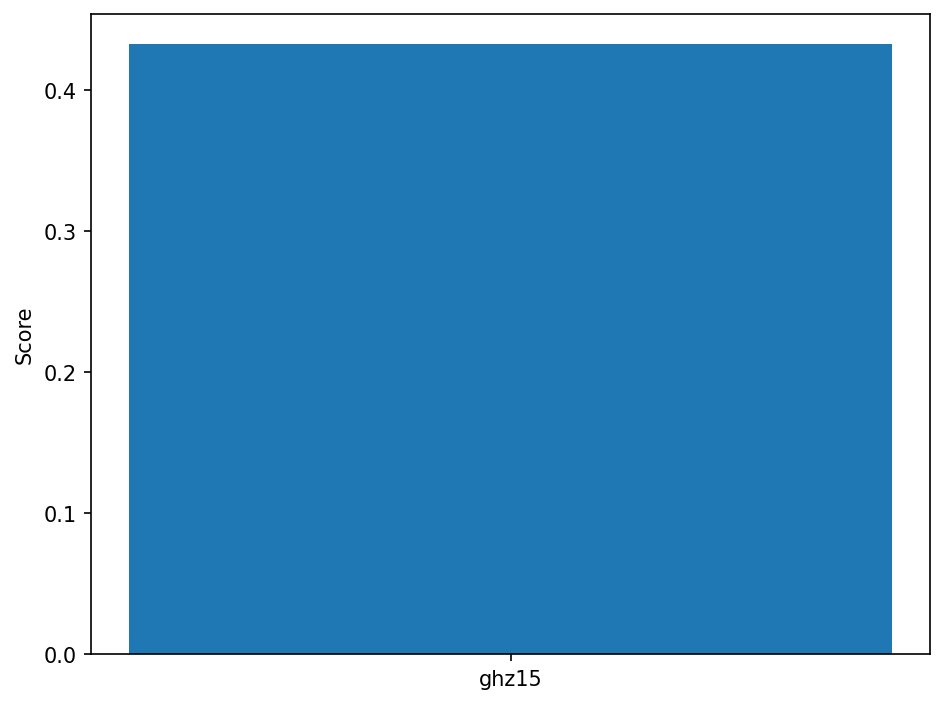

-----------------------------------------------------------
USED BACKEND:: fake_washington ; CIRCUIT_NAME: ghz3 ; SCORE = 0.9539219785720243


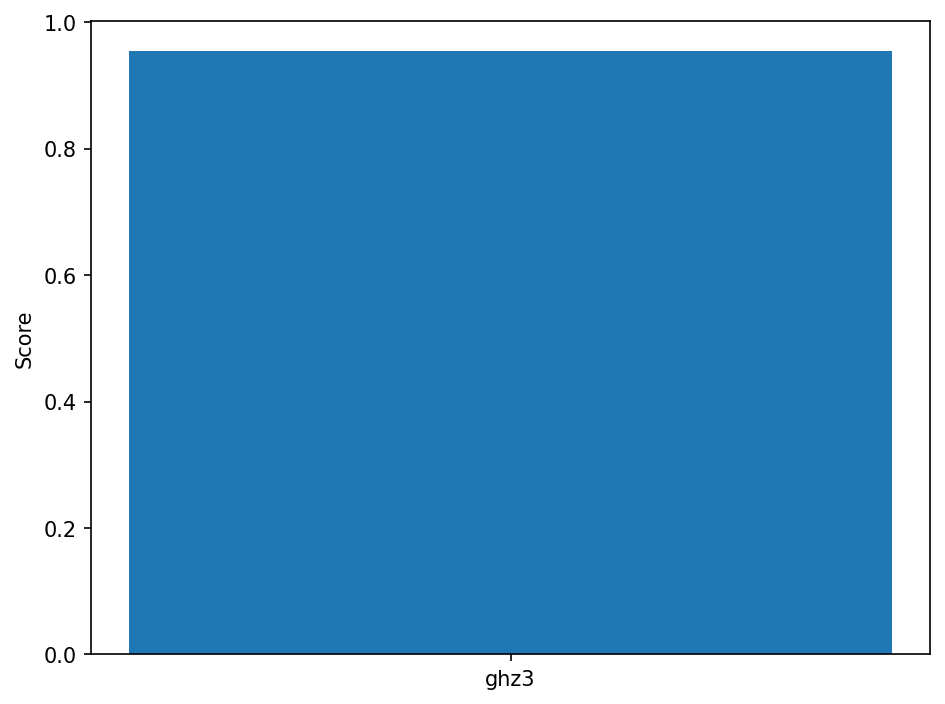

-----------------------------------------------------------
USED BACKEND:: fake_washington ; CIRCUIT_NAME: ghz5 ; SCORE = 0.7633036366029138


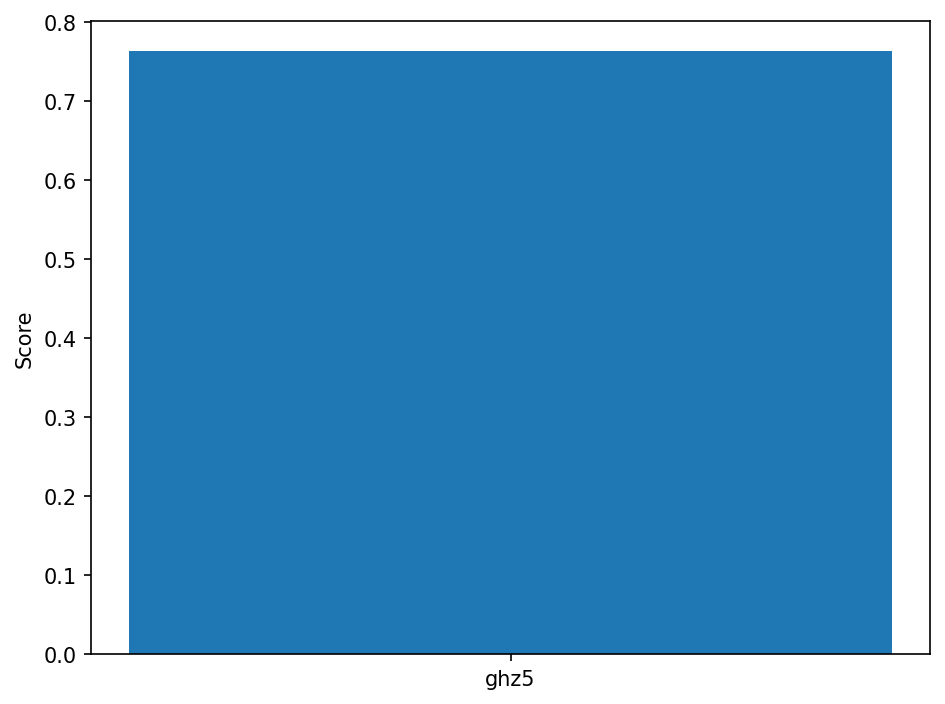

-----------------------------------------------------------
USED BACKEND:: fake_washington ; CIRCUIT_NAME: ghz7 ; SCORE = 0.6855962571192024


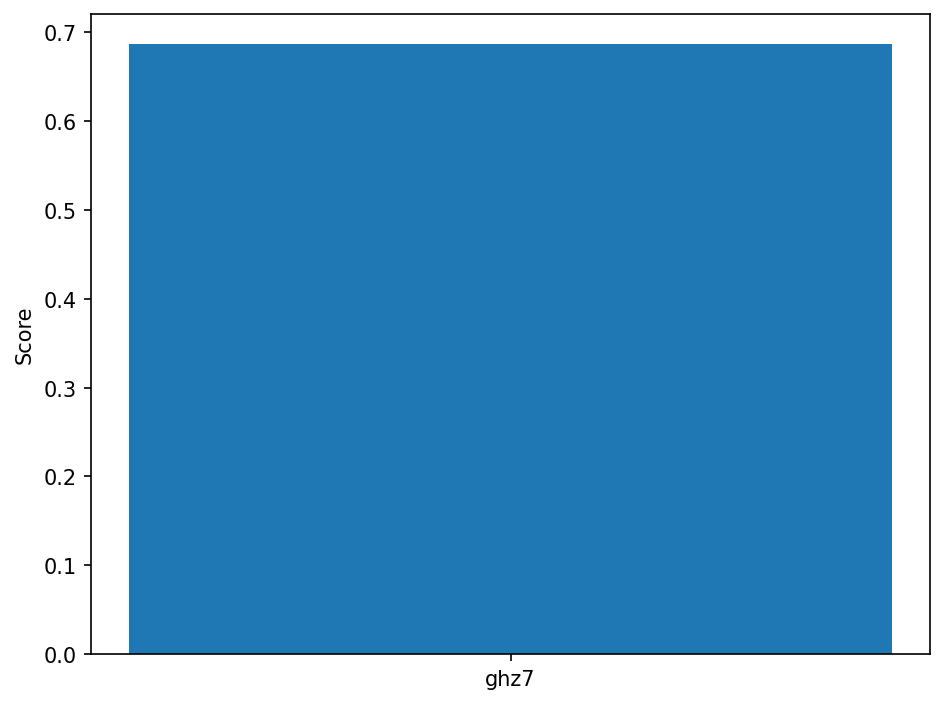

-----------------------------------------------------------
USED BACKEND:: fake_washington ; CIRCUIT_NAME: ghz9 ; SCORE = 0.6544301002839339


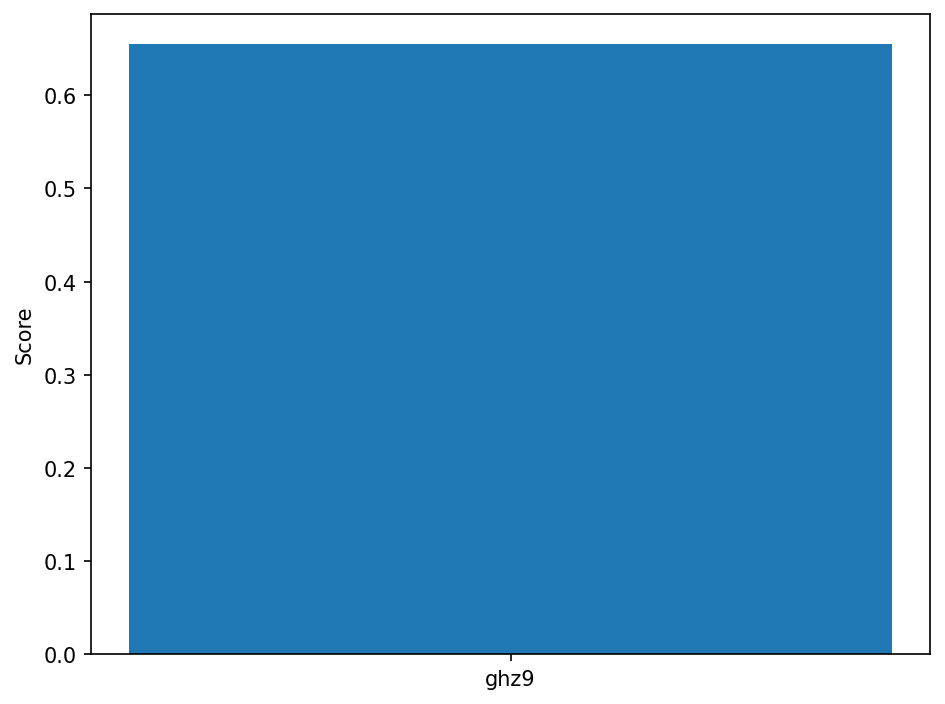

-----------------------------------------------------------
USED BACKEND:: fake_washington ; CIRCUIT_NAME: ghz11 ; SCORE = 0.14498989856457936


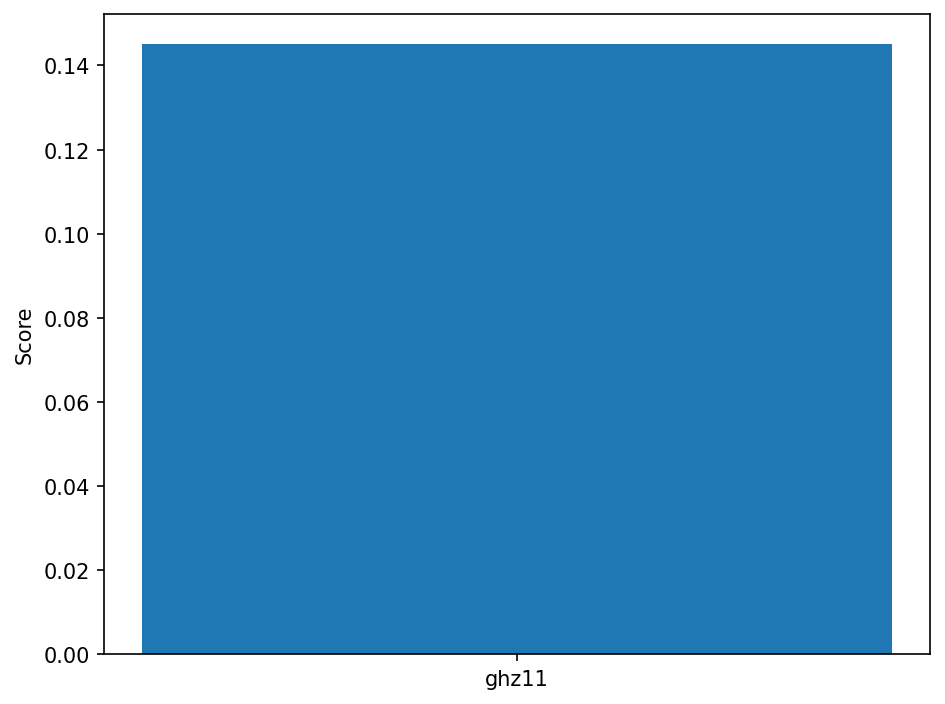

-----------------------------------------------------------
USED BACKEND:: fake_washington ; CIRCUIT_NAME: ghz13 ; SCORE = 0.08172964212380748


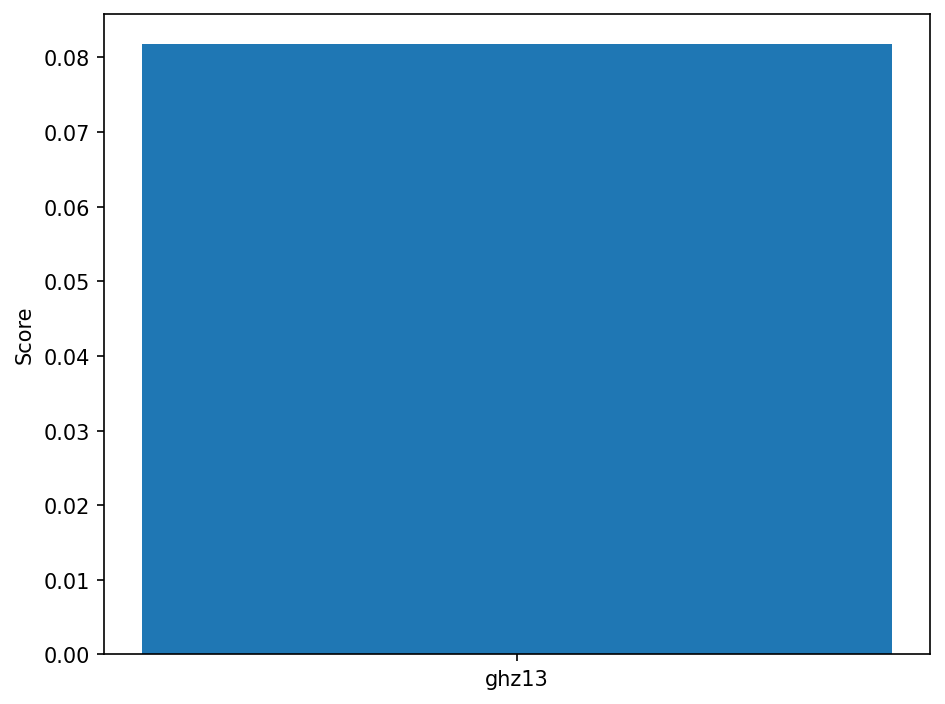

-----------------------------------------------------------
USED BACKEND:: fake_washington ; CIRCUIT_NAME: ghz15 ; SCORE = 0.06897793988186349


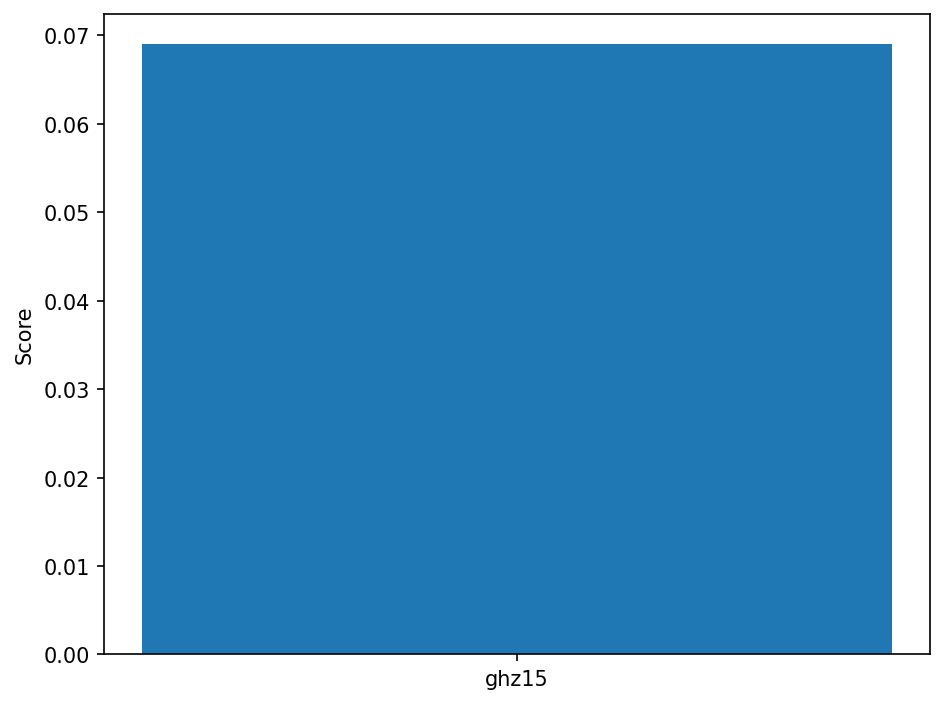

-----------------------------------------------------------
USED BACKEND:: fake_jakarta ; CIRCUIT_NAME: ghz3 ; SCORE = 0.9101957588551436


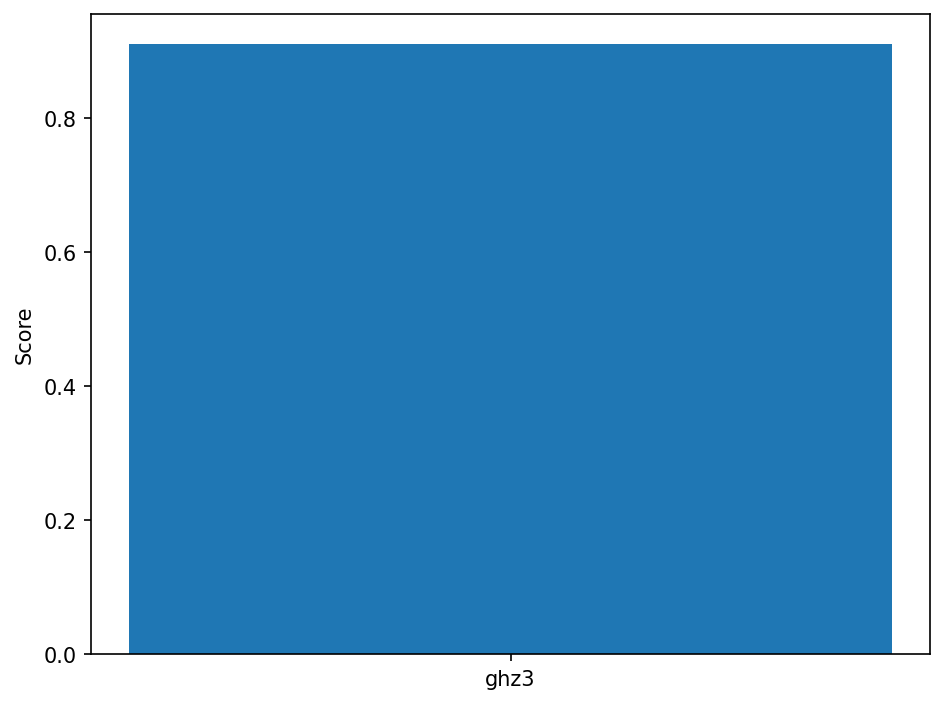

-----------------------------------------------------------
USED BACKEND:: fake_jakarta ; CIRCUIT_NAME: ghz5 ; SCORE = 0.8804387089305582


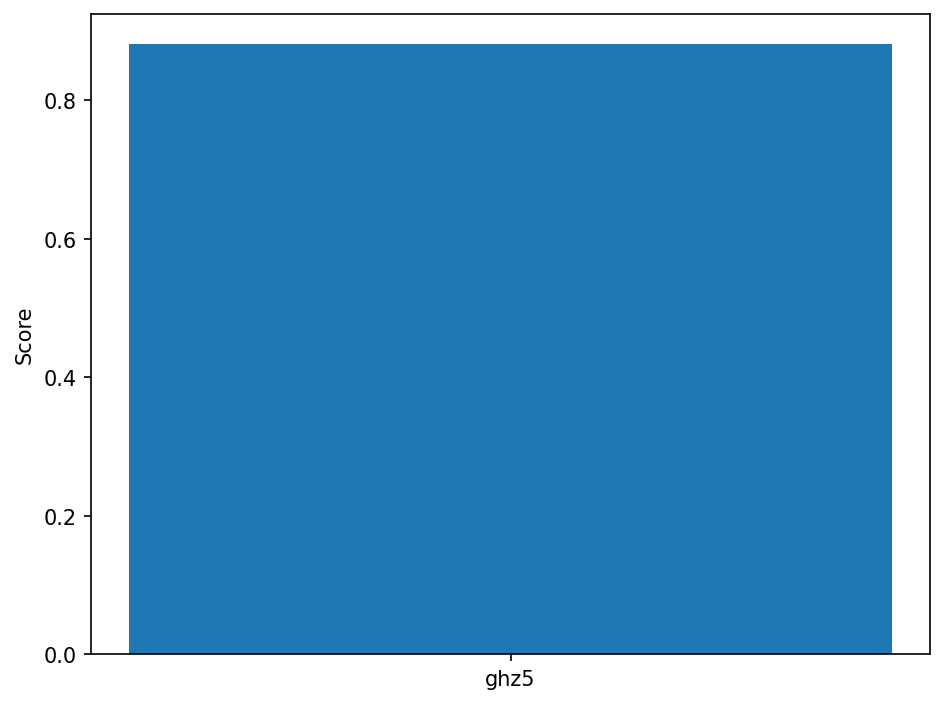

-----------------------------------------------------------
USED BACKEND:: fake_jakarta ; CIRCUIT_NAME: ghz7 ; SCORE = 0.8285183793993245


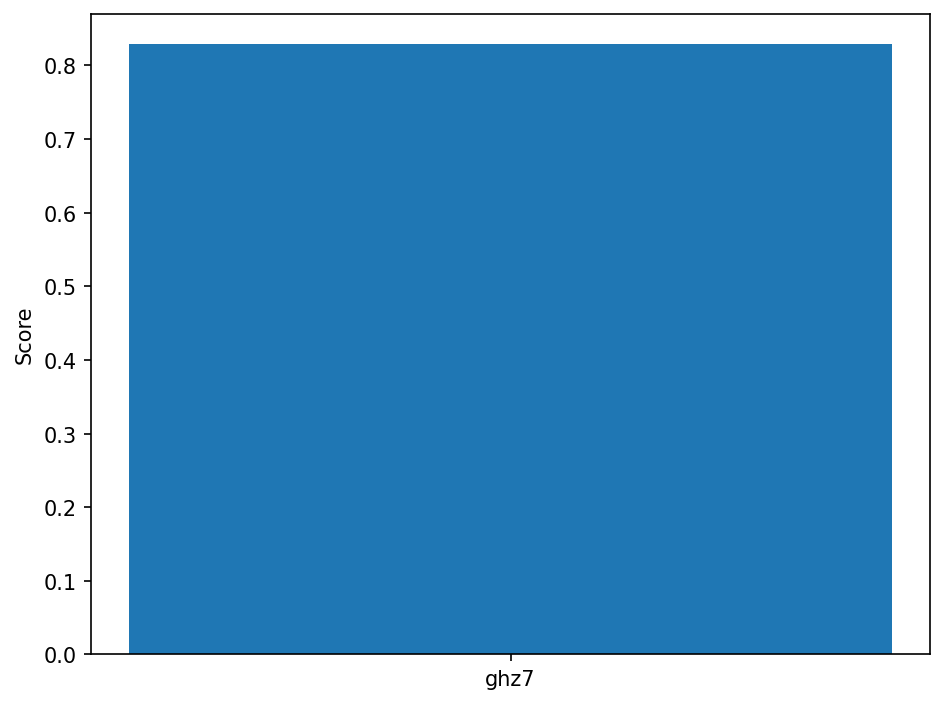

-----------------------------------------------------------
USED BACKEND:: fake_jakarta ; CIRCUIT_NAME: ghz9 ; SCORE = 0.8216610277528223


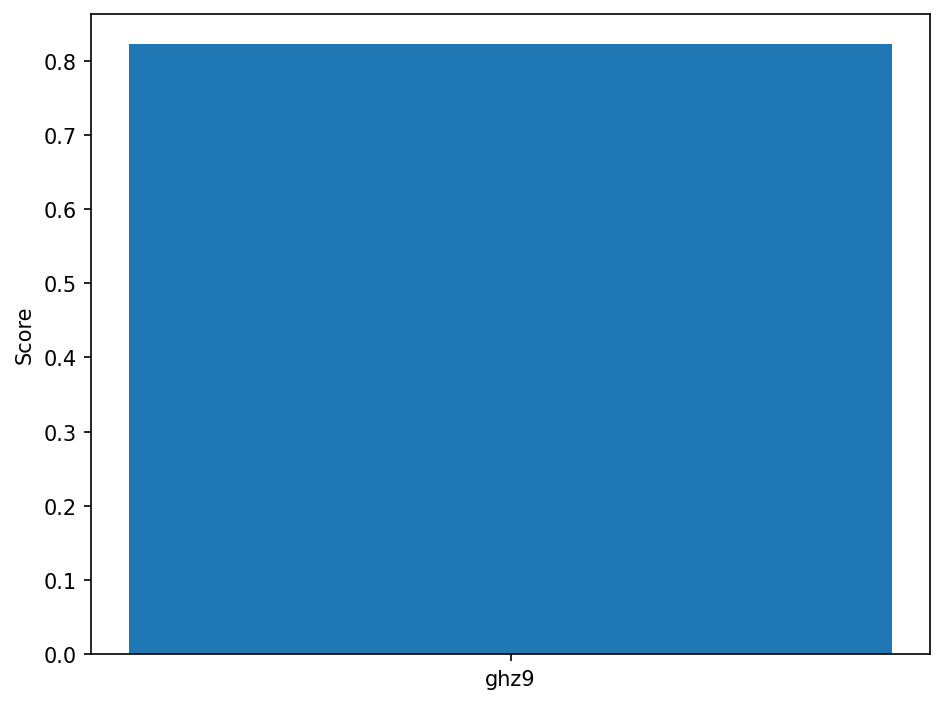

-----------------------------------------------------------
USED BACKEND:: fake_jakarta ; CIRCUIT_NAME: ghz11 ; SCORE = 0.8223919095642198


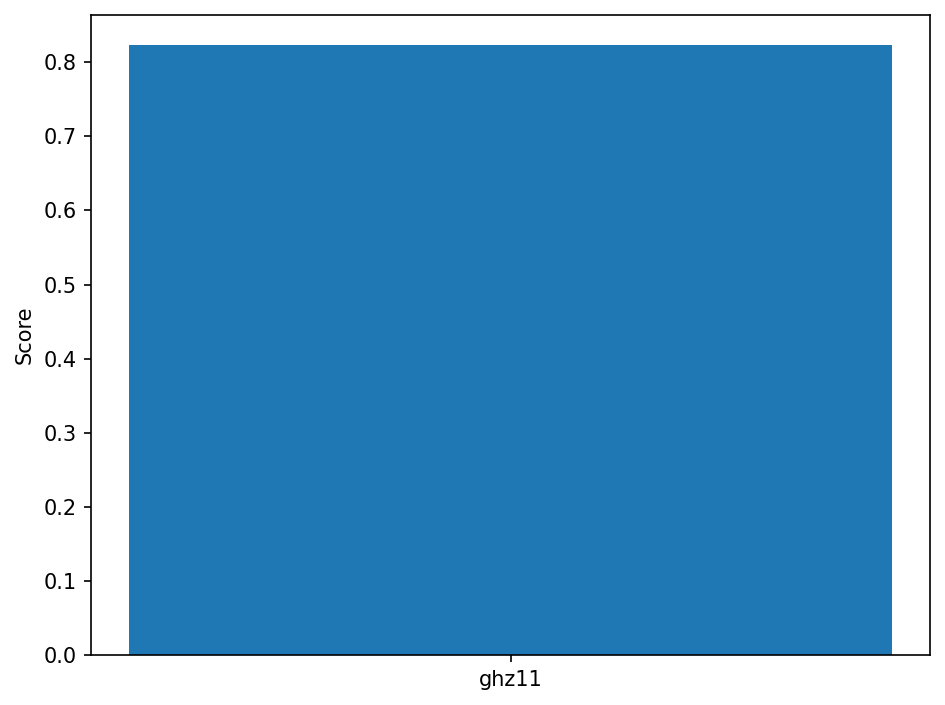

-----------------------------------------------------------
USED BACKEND:: fake_jakarta ; CIRCUIT_NAME: ghz13 ; SCORE = 0.8250903368075877


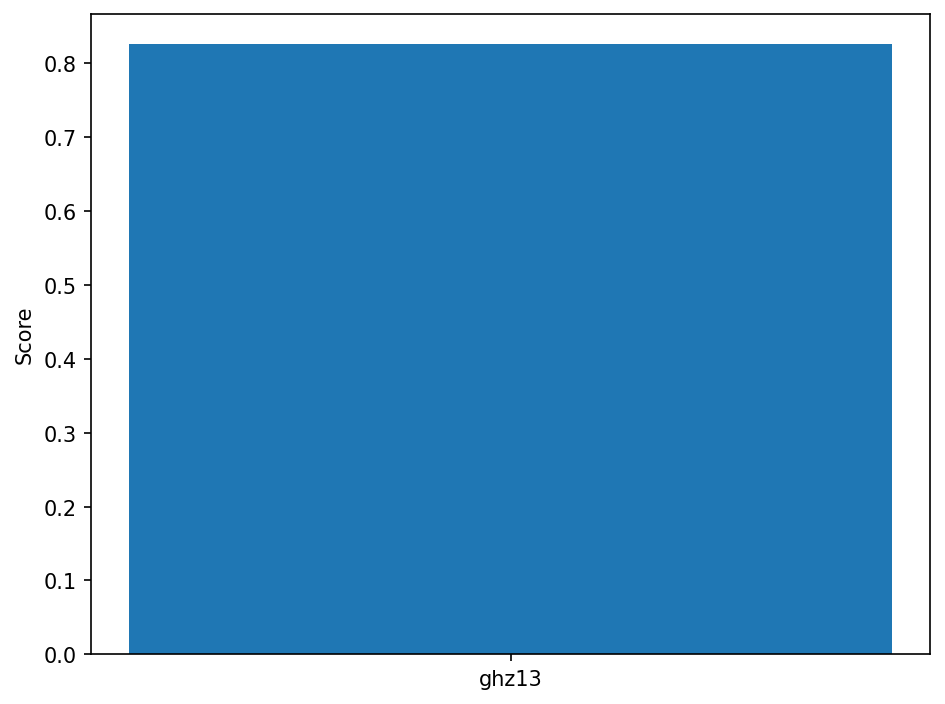

-----------------------------------------------------------
USED BACKEND:: fake_jakarta ; CIRCUIT_NAME: ghz15 ; SCORE = 0.8248586588173143


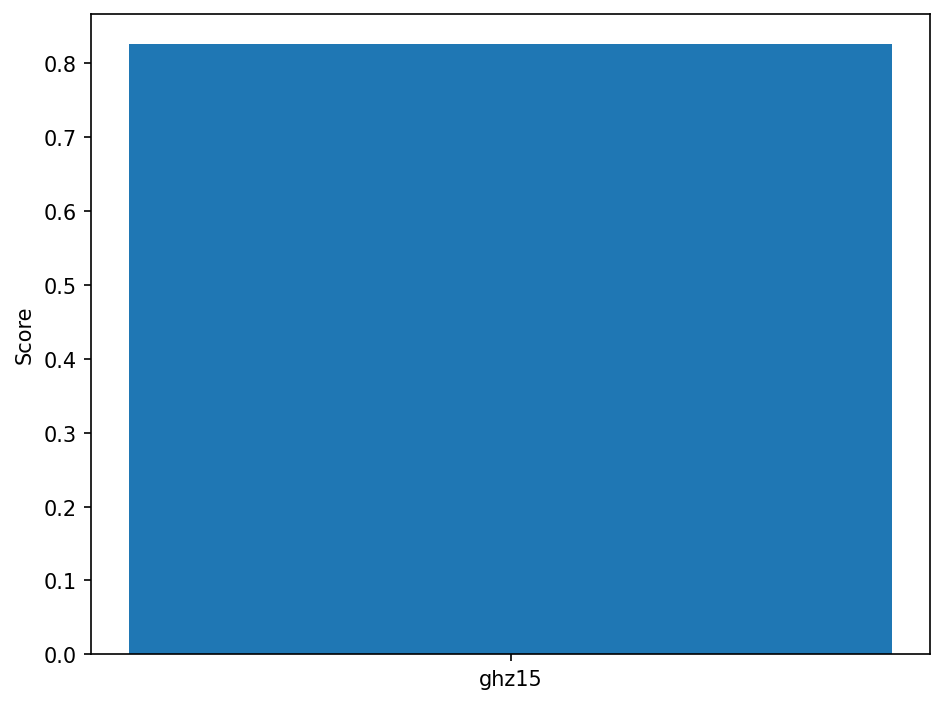

-----------------------------------------------------------
USED BACKEND:: fake_vigo ; CIRCUIT_NAME: ghz3 ; SCORE = 0.8779157258320138


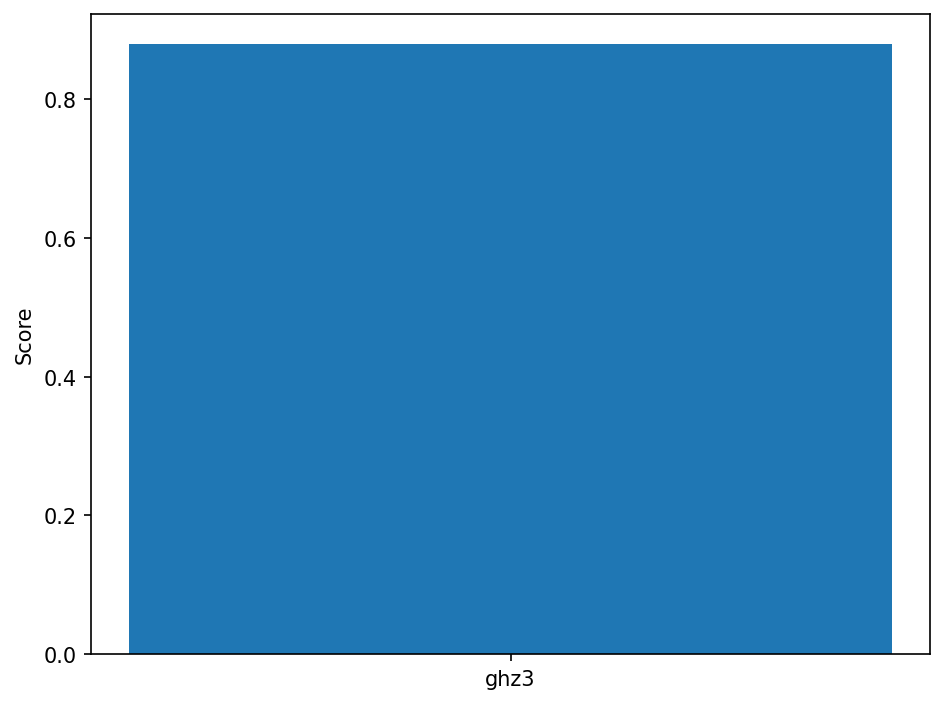

-----------------------------------------------------------
USED BACKEND:: fake_vigo ; CIRCUIT_NAME: ghz5 ; SCORE = 0.8212300511475845


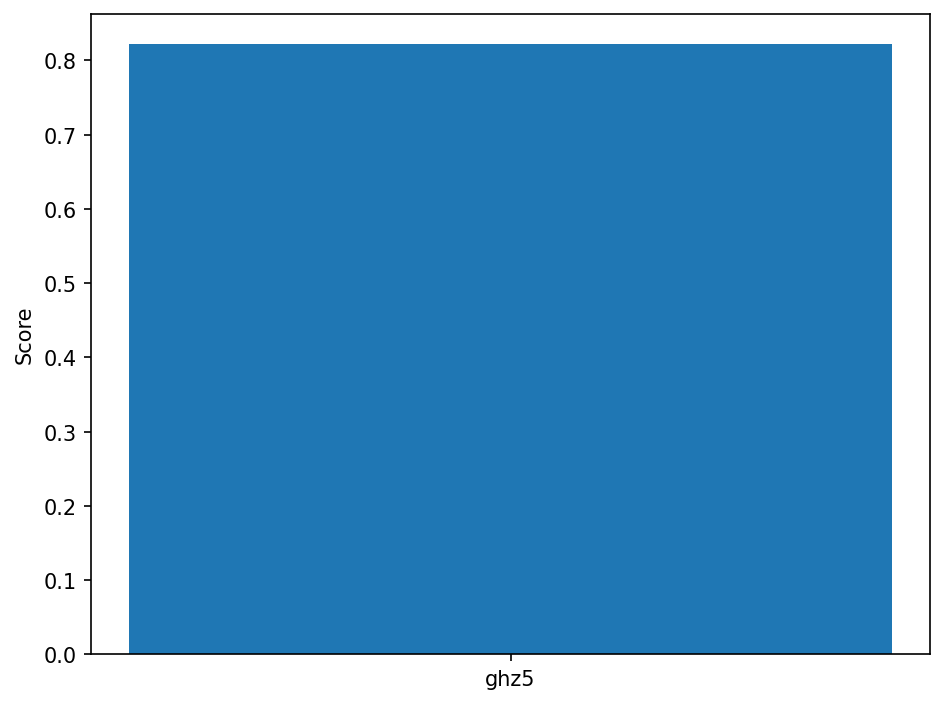

-----------------------------------------------------------
USED BACKEND:: fake_vigo ; CIRCUIT_NAME: ghz7 ; SCORE = 0.8337387415894041


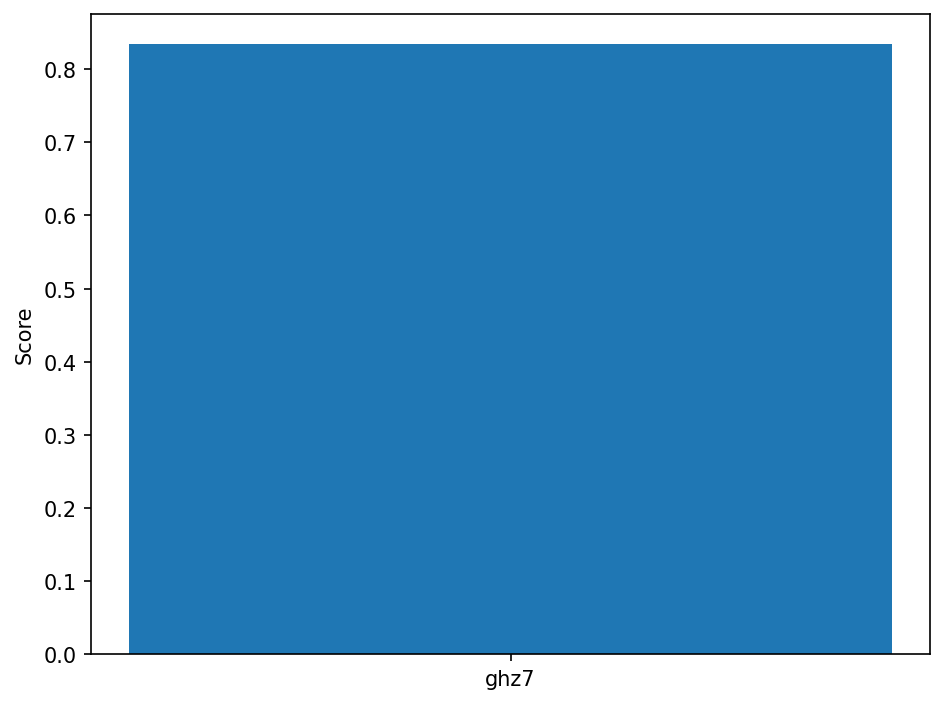

-----------------------------------------------------------
USED BACKEND:: fake_vigo ; CIRCUIT_NAME: ghz9 ; SCORE = 0.8349641956961218


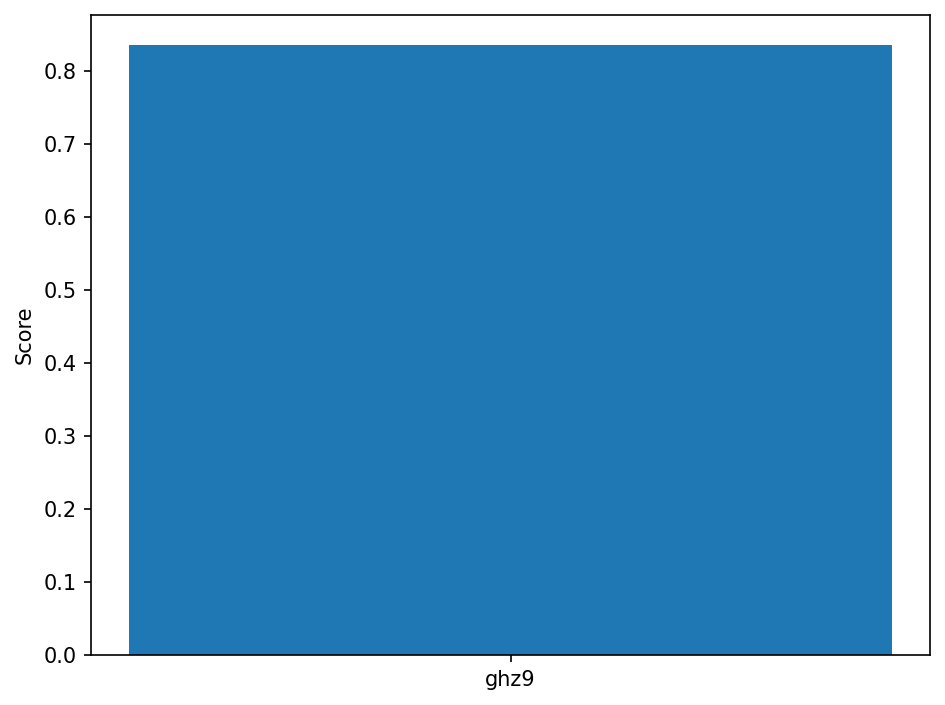

-----------------------------------------------------------
USED BACKEND:: fake_vigo ; CIRCUIT_NAME: ghz11 ; SCORE = 0.8336215238166851


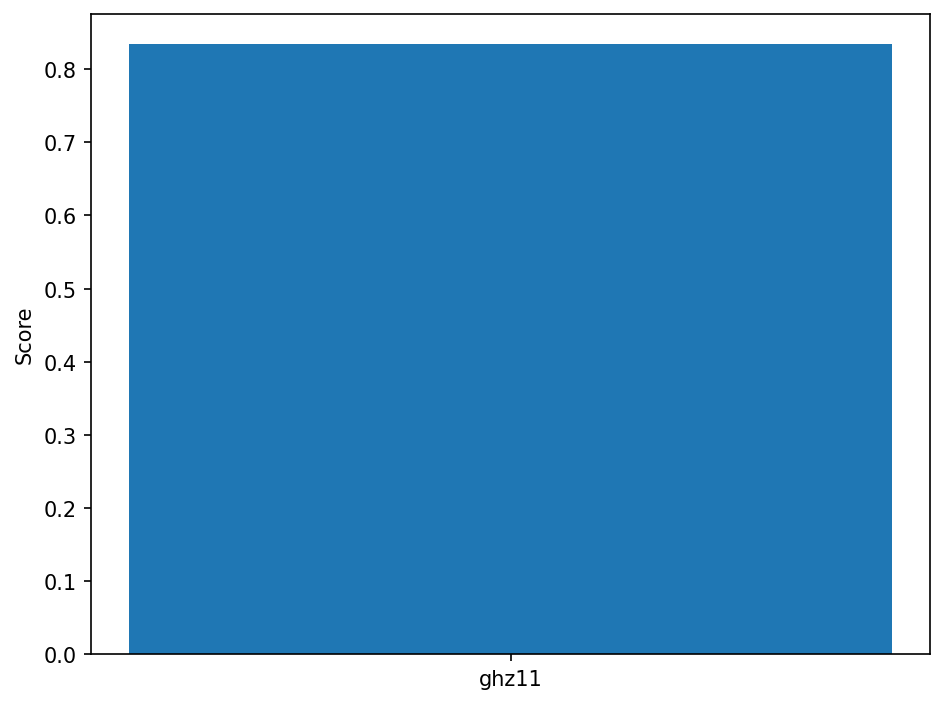

-----------------------------------------------------------
USED BACKEND:: fake_vigo ; CIRCUIT_NAME: ghz13 ; SCORE = 0.8391239731821958


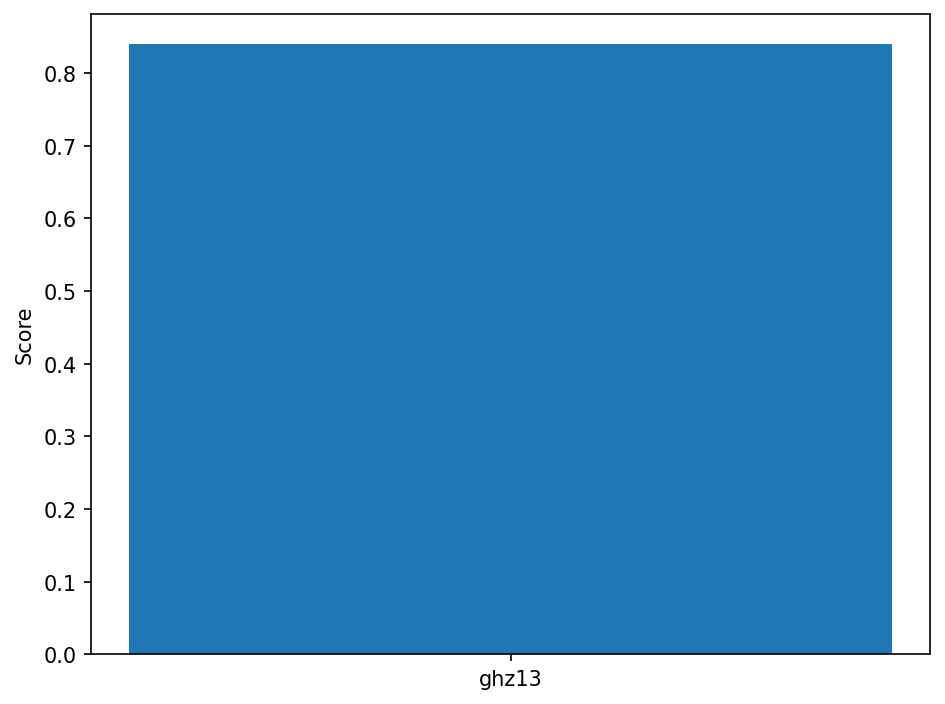

-----------------------------------------------------------
USED BACKEND:: fake_vigo ; CIRCUIT_NAME: ghz15 ; SCORE = 0.8201395961494573


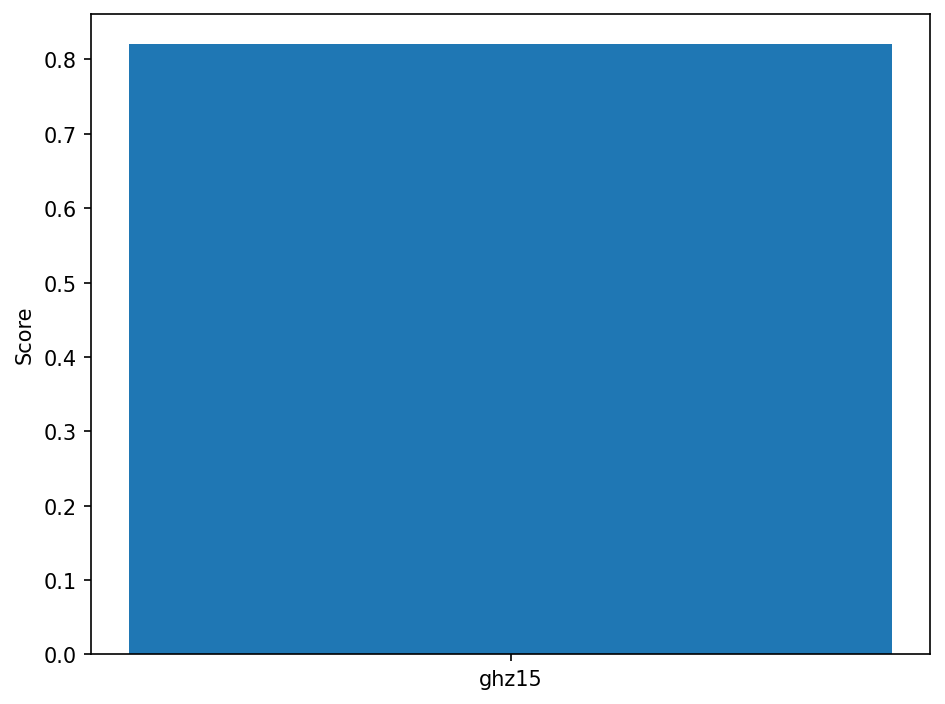

-----------------------------------------------------------
USED BACKEND:: fake_lima ; CIRCUIT_NAME: ghz3 ; SCORE = 0.9189965053567336


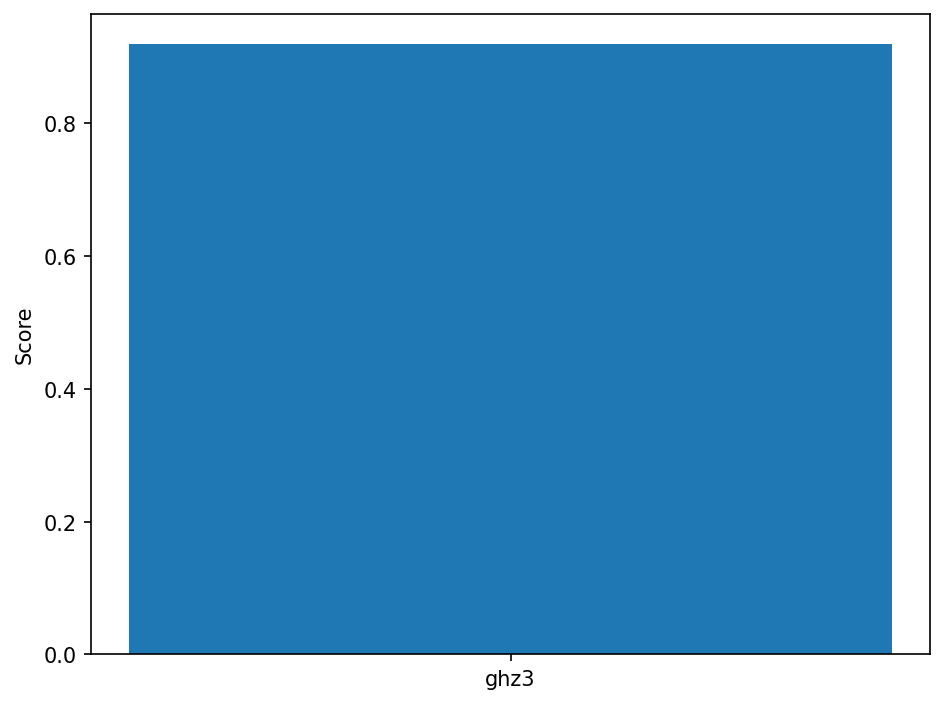

-----------------------------------------------------------
USED BACKEND:: fake_lima ; CIRCUIT_NAME: ghz5 ; SCORE = 0.8137187677837368


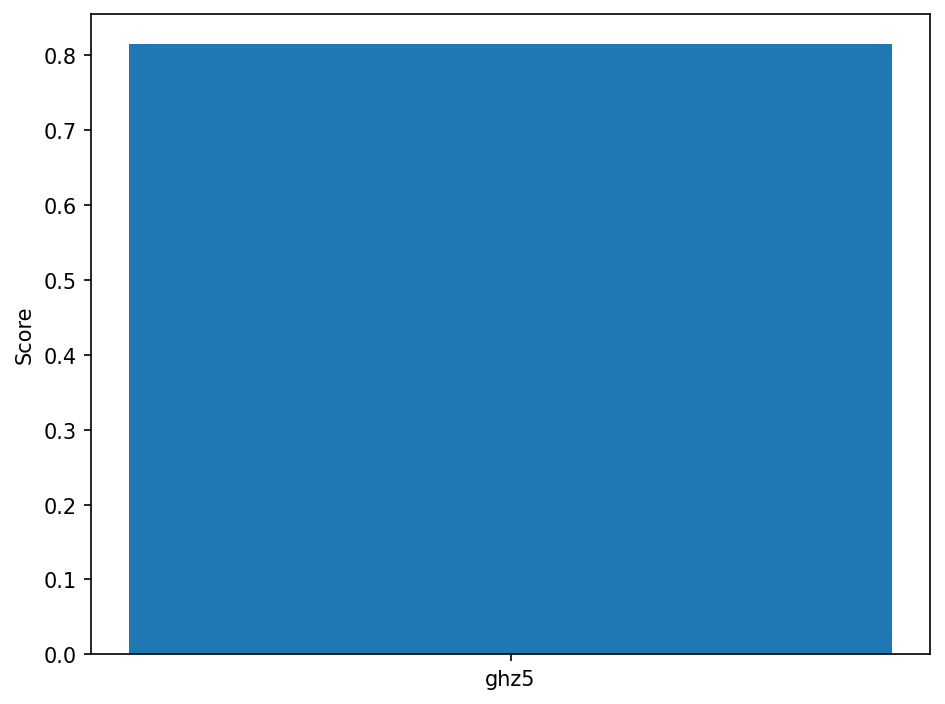

-----------------------------------------------------------
USED BACKEND:: fake_lima ; CIRCUIT_NAME: ghz7 ; SCORE = 0.8137489227867645


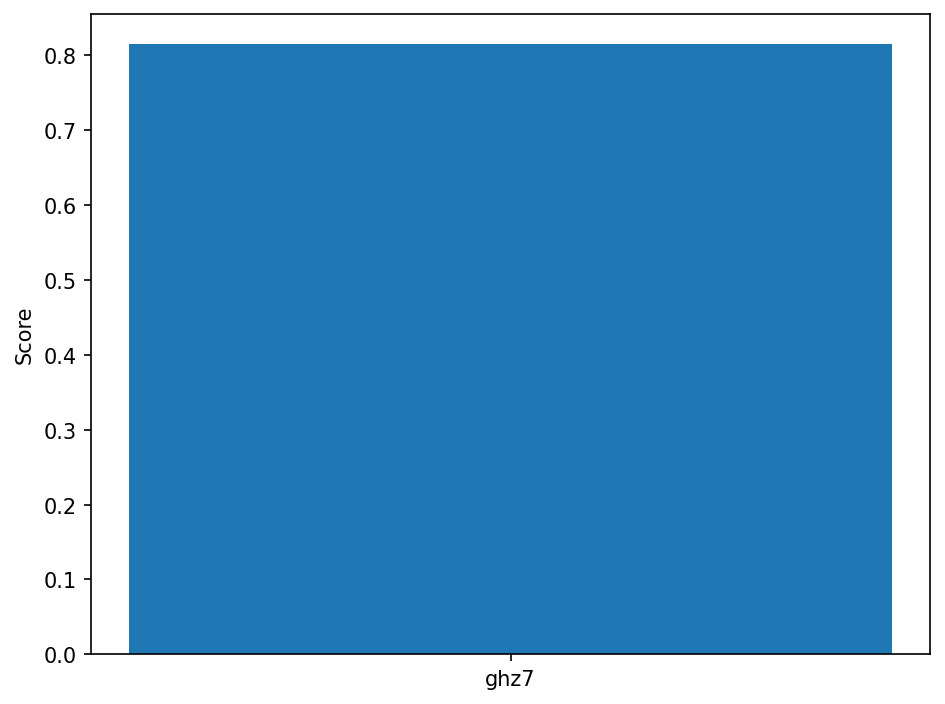

-----------------------------------------------------------
USED BACKEND:: fake_lima ; CIRCUIT_NAME: ghz9 ; SCORE = 0.8112149825823897


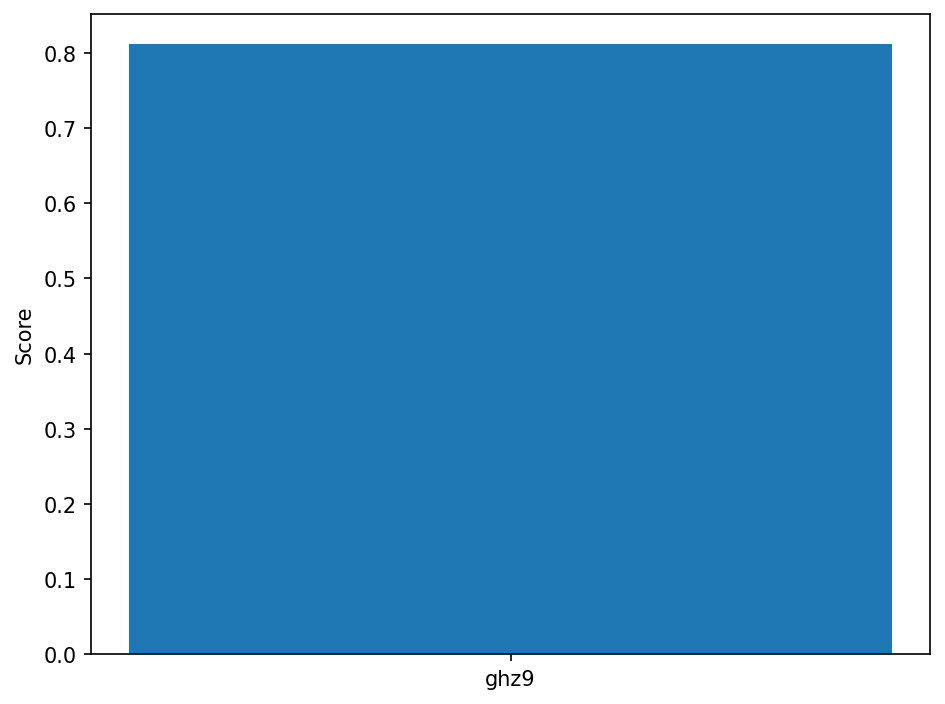

-----------------------------------------------------------
USED BACKEND:: fake_lima ; CIRCUIT_NAME: ghz11 ; SCORE = 0.8140855598144139


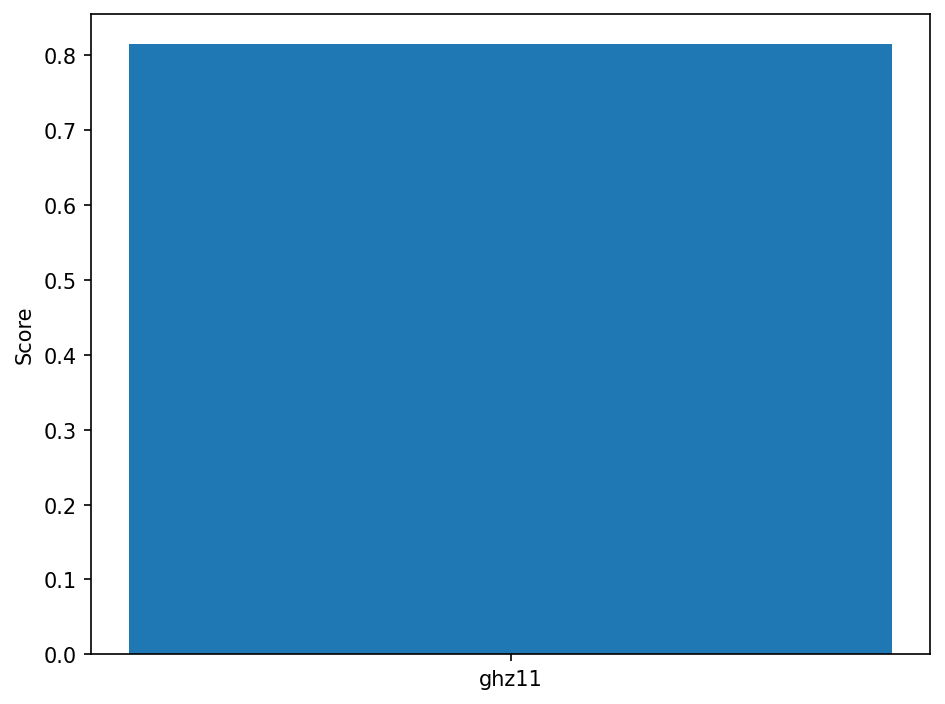

-----------------------------------------------------------
USED BACKEND:: fake_lima ; CIRCUIT_NAME: ghz13 ; SCORE = 0.803130717711921


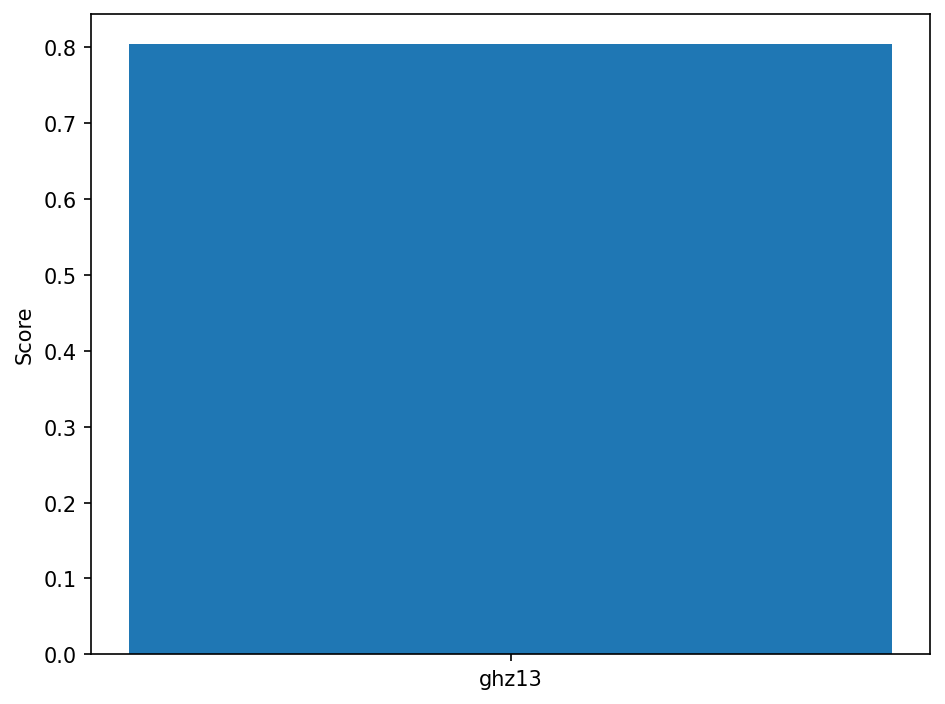

-----------------------------------------------------------
USED BACKEND:: fake_lima ; CIRCUIT_NAME: ghz15 ; SCORE = 0.815746775947425


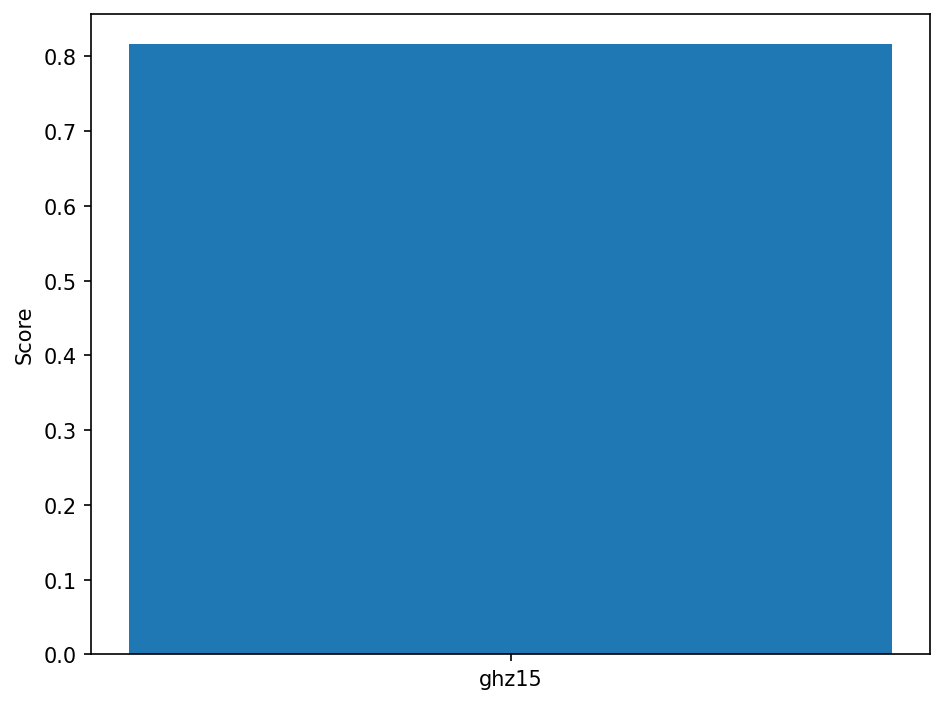

-----------------------------------------------------------


In [7]:
for label,benchmark,backend,job,score,sd in jobs:
    print("USED BACKEND::",backend().name,"; CIRCUIT_NAME:",label, "; SCORE =",score)
    supermarq.plotting.plot_results([score], [label])
    print("-----------------------------------------------------------")

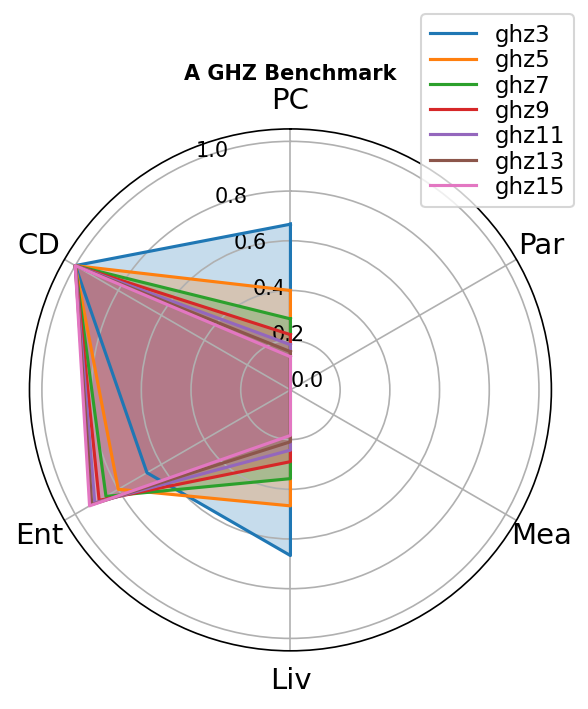

In [8]:
names=[]
scores=[]
for i,j in benchmark_features.items():
    names.append(i)
    scores.append(j)
supermarq.plotting.plot_benchmark(
        ["A GHZ Benchmark",['ghz3', 'ghz5', 'ghz7', 'ghz9', 'ghz11', 'ghz13', 'ghz15'],[[0.6666666666666666, 1.0, 0.6666666666666666, 0.6666666666666666, 0.0, 0], [0.4, 1.0, 0.8, 0.4666666666666667, 0.0, 0], [0.2857142857142857, 1.0, 0.8571428571428571, 0.35714285714285715, 0.0, 0], [0.2222222222222222, 1.0, 0.8888888888888888, 0.28888888888888886, 0.0, 0], [0.18181818181818182, 1.0, 0.9090909090909091, 0.24242424242424243, 0.0, 0], [0.15384615384615385, 1.0, 0.9230769230769231, 0.2087912087912088, 0.0, 0], [0.13333333333333333, 1.0, 0.9333333333333333, 0.18333333333333332, 0.0, 0]]],
        spoke_labels=["PC", "CD", "Ent", "Liv", "Mea", "Par"],
        show=True)

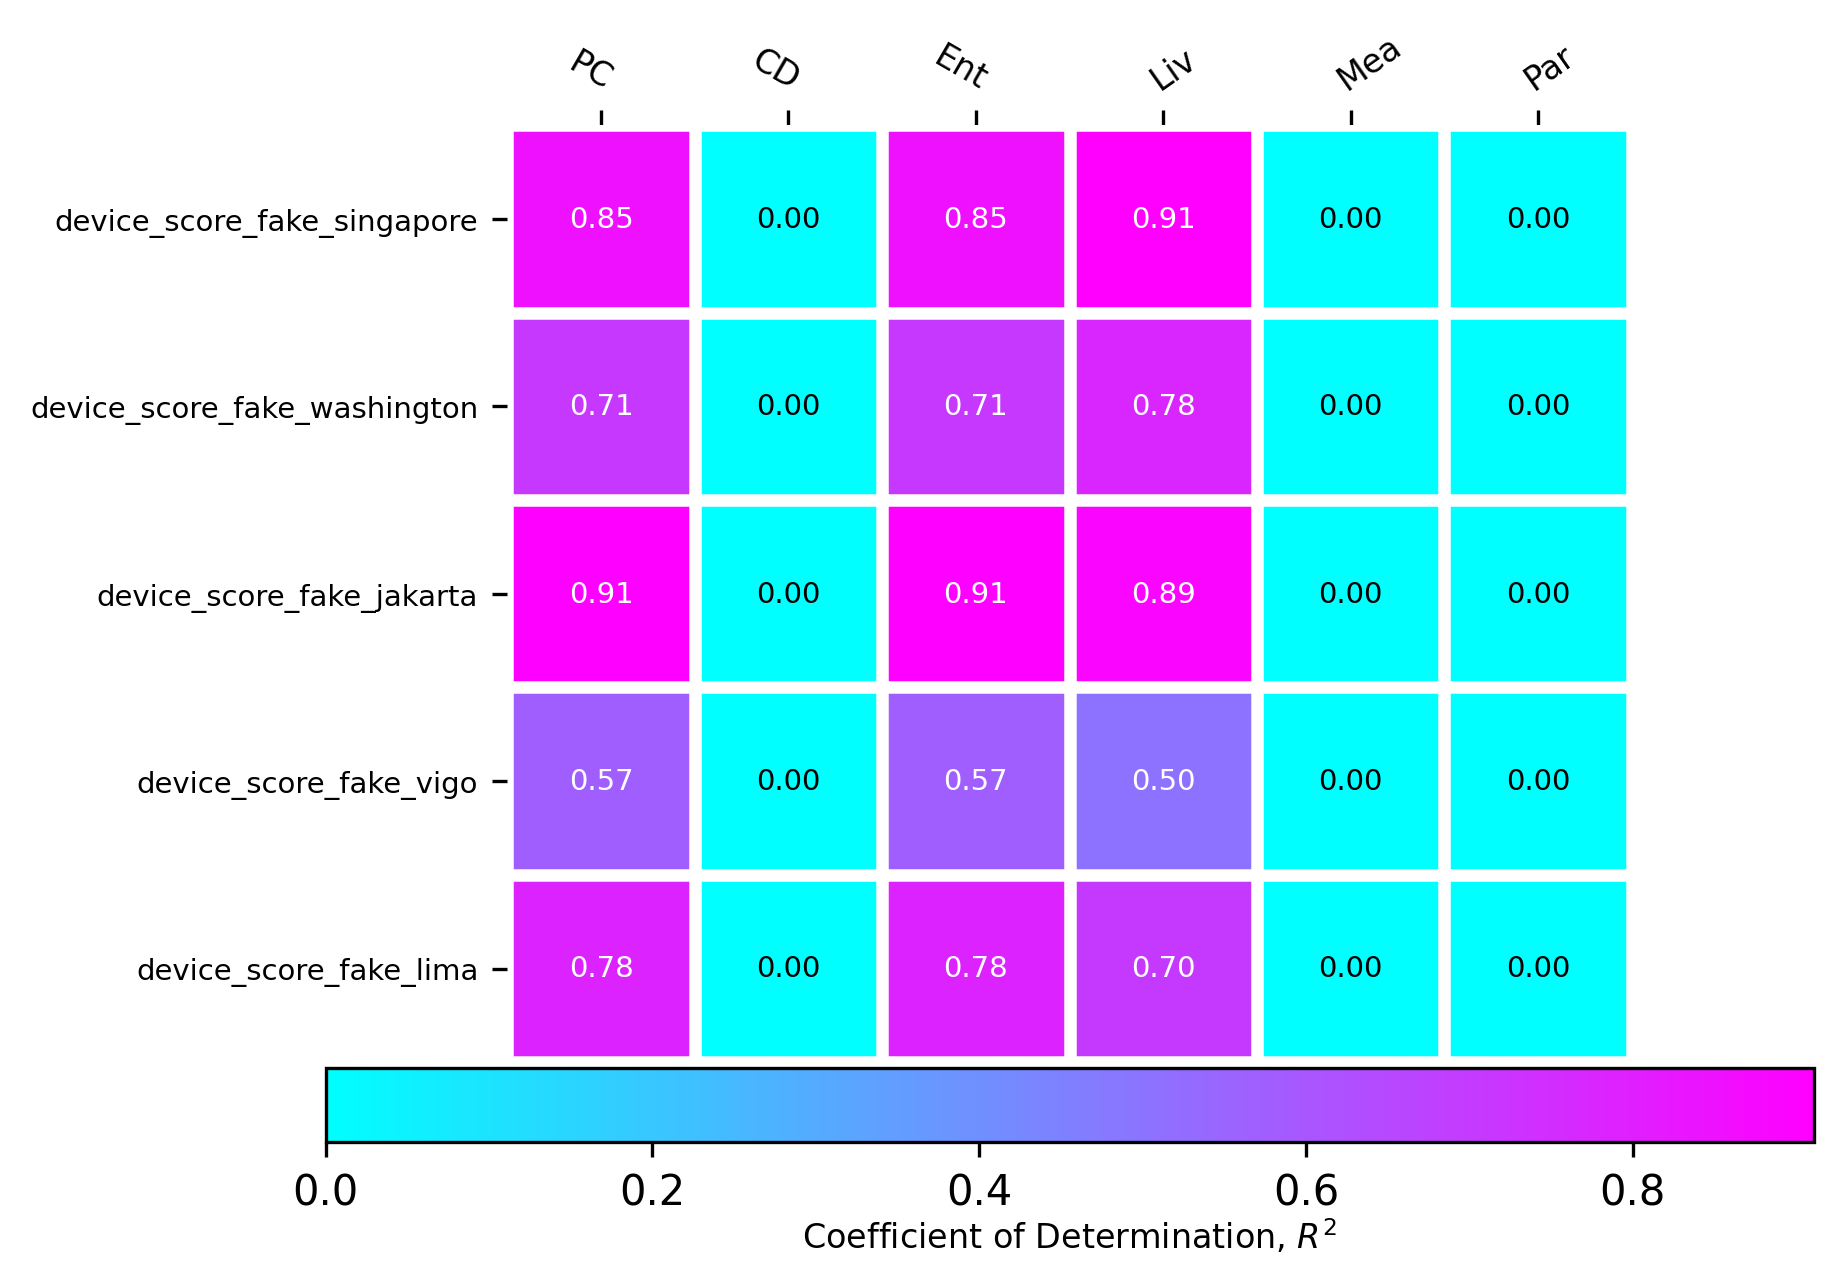

In [9]:
supermarq.plotting.plot_correlations(benchmark_features,all_fake_scores,["PC", "CD", "Ent", "Liv", "Mea", "Par"],device_name=all_fake_names,show=True,)

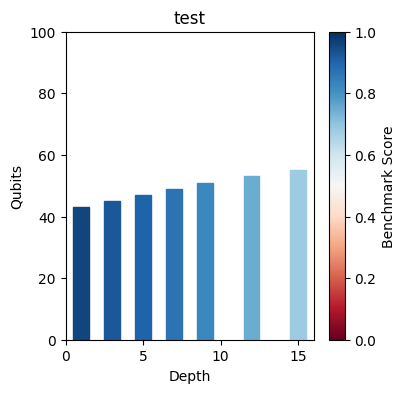

In [10]:
supermarq.plotting.plot_volumetric_results(
[(1.0,3,0.9578956044901644,),(3.0,5,0.9232678180840281,),(5.0,7,0.9039955751995808,),(7.0,9,0.8699816088066253,),(9.0,11, 0.8209119881290019,),(12.0,13,0.7484919785236042,),(15.0,15,0.682999633967593,)],
ymax=100,xmax=16,rect_width=1,rect_height=80,title="test",show=True,)

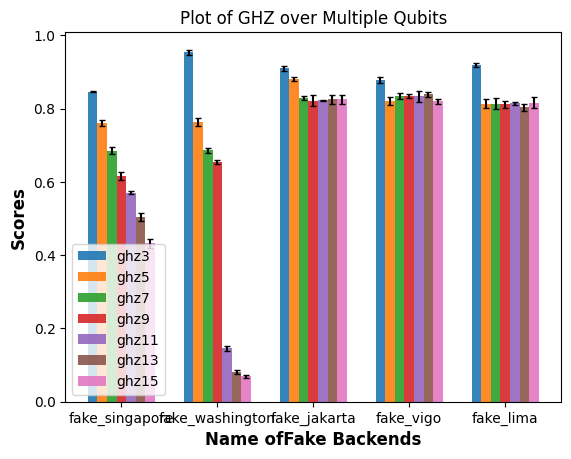

In [11]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np
all_fake_names=[]
all_score=[]
all_sd=[]
all_ckt=[]
for i in selected_fakes:
    all_fake_names.append(i().name)    
for benchmark, label in benchmarks:
    i=[]
    j=[]
    k=[]
    for ckt,benchmark,backend,job,score,sd in jobs:
        if ckt == label:
            i.append(score)
            j.append(sd)
    all_ckt.append(label)
    all_score.append(i)
    all_sd.append(j)
num_bars = len(all_score)
width = 0.1
x = np.arange(len(all_fake_names)) # x-axis positions for each bar
fig, ax = plt.subplots()
for i in range(num_bars):               # Create bars for each category with appropriate offsets
    ax.bar(x + i * width, all_score[i], width=width, label=f'Bar {i+1}', 
           yerr=all_sd[i],align='center',alpha=0.9,ecolor='black',capsize=2)
ax.set_xlabel('Name ofFake Backends',fontweight ='bold',fontsize = 12)
ax.set_ylabel('Scores',fontweight ='bold',fontsize = 12)
ax.set_title('Plot of GHZ over Multiple Qubits')
ax.set_xticks(x + (num_bars - 1) * width / 2)
ax.set_xticklabels(all_fake_names)
ax.legend(all_ckt,loc="lower left")
#ax.grid(True)
plt.show()